In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def explore_data(data_dir):
    classes = os.listdir(data_dir)
    num_images = []
    for class_name in classes:
        class_path = os.path.join(data_dir,class_name)
        num_images.append(len(os.listdir(class_path)))
    data = pd.DataFrame({'class':classes,'No_of_images':num_images})
    
    plt.figure(figsize=(10,6))
    sns.barplot(x = 'class',y='No_of_images',data=data)
    plt.title('Distribution of Images in each class')
    plt.show()

In [3]:
class MLP(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

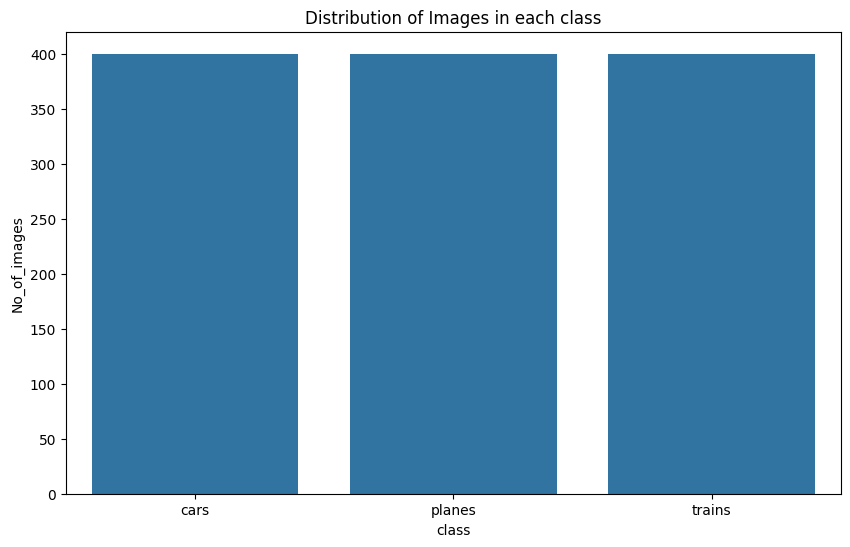

In [4]:
transform = transforms.Compose([transforms.Resize((64,64)),transforms.ToTensor()])
dataset_path = "vehicle"
explore_data(dataset_path)
vehicle_dataset = datasets.ImageFolder(root=dataset_path,transform=transform)

In [5]:
train_size = int(0.8*len(vehicle_dataset))
test_size = len(vehicle_dataset) - train_size
train_dataset,test_dataset = torch.utils.data.random_split(vehicle_dataset,[train_size,test_size])
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

In [6]:
input_size = 64 * 64 * 3
hidden_size = 128
output_size = len(vehicle_dataset.classes)

In [7]:
model = MLP(input_size,hidden_size,output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [8]:
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images,labels in train_loader:
        images = images.view(-1,input_size)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f'Epoch{epoch+1}/{epochs},Loss:{running_loss/len(train_loader)}')

Epoch1/10,Loss:0.0733935515085856
Epoch1/10,Loss:0.14532057444254556
Epoch1/10,Loss:0.21745469570159912
Epoch1/10,Loss:0.28636190891265867
Epoch1/10,Loss:0.35908934275309246
Epoch1/10,Loss:0.43210602601369225
Epoch1/10,Loss:0.5072197516759237
Epoch1/10,Loss:0.5793566226959228
Epoch1/10,Loss:0.6491135597229004
Epoch1/10,Loss:0.7203287283579508
Epoch1/10,Loss:0.7897301435470581
Epoch1/10,Loss:0.8572961648305257
Epoch1/10,Loss:0.9282444079717
Epoch1/10,Loss:0.9968947251637776
Epoch1/10,Loss:1.0634668628374735
Epoch2/10,Loss:0.06376689672470093
Epoch2/10,Loss:0.12712880373001098
Epoch2/10,Loss:0.19578287998835245
Epoch2/10,Loss:0.2578882336616516
Epoch2/10,Loss:0.32271724144617714
Epoch2/10,Loss:0.38489356835683186
Epoch2/10,Loss:0.44045335054397583
Epoch2/10,Loss:0.5045152068138122
Epoch2/10,Loss:0.5722393790880839
Epoch2/10,Loss:0.6410422682762146
Epoch2/10,Loss:0.7135664979616801
Epoch2/10,Loss:0.7888794779777527
Epoch2/10,Loss:0.851875102519989
Epoch2/10,Loss:0.913161551952362
Epoch2/1

In [9]:
model.eval()
correct = 0
total = 0

In [11]:
with torch.no_grad():
    for images,labels in test_loader:
        images = images.view(-1,input_size)
        outputs = model(images)
        _,predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
accuracy = correct/total
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.5394736842105263


In [ ]:
torch.save(model.state_dict(),'Vehicle_classification_model.pth')